# **DATA 311 UBCO, Random Forest implemented in Python**

## **Assignment 3, CART:**

### **Random Forest Implementation:**

In [3]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import log_loss
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('datasalaries.csv')
df.head(10)

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education
0,Google,400000,5,5,Male,Asian,PhD
1,Microsoft,136000,3,2,Male,Two Or More,Bachelor's Degree
2,Google,337000,6,6,Male,Asian,Bachelor's Degree
3,Microsoft,222000,4,4,Male,Asian,Master's Degree
4,Amazon,310000,15,3,Male,Asian,Bachelor's Degree
5,Amazon,620000,19,7,Male,Asian,Bachelor's Degree
6,Apple,180000,1,1,Male,Asian,Bachelor's Degree
7,Amazon,210000,4,1,Male,Hispanic,Highschool
8,Amazon,142000,0,0,Male,Asian,Master's Degree
9,Facebook,242000,2,2,Male,White,Master's Degree


In [ ]:
df.describe()

### **Training Testing split, 75% 25% again:**

In [4]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.75*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['company', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'gender', 'Race', 'Education'],
      dtype='object')

### **Time to make the Forest:**

    we do this with RF = RandomForestRegressor(max_depth= A , n_estimators= B, random_state= C ).fit(x_train, y_train)
    Just like BAgging with sklearn: A is the amount we prune the tree by, B is the number of Trees, & C is the seed

In [5]:
x_train = pd.get_dummies(training_data.drop('totalyearlycompensation', axis=1)); y_train = training_data['totalyearlycompensation']

Random_Forest        = RandomForestRegressor(             n_estimators=500, random_state=42).fit(x_train, y_train)
Random_Forest_pruned = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=42).fit(x_train, y_train)

    to predict we model.predict(x) as always 

In [6]:
x_test = pd.get_dummies(testing_data.drop('totalyearlycompensation', axis=1)); y_test = testing_data['totalyearlycompensation']

RF_predictions        = Random_Forest       .predict(x_test)
RF_predictions_pruned = Random_Forest_pruned.predict(x_test)

### **And here's the plot:**

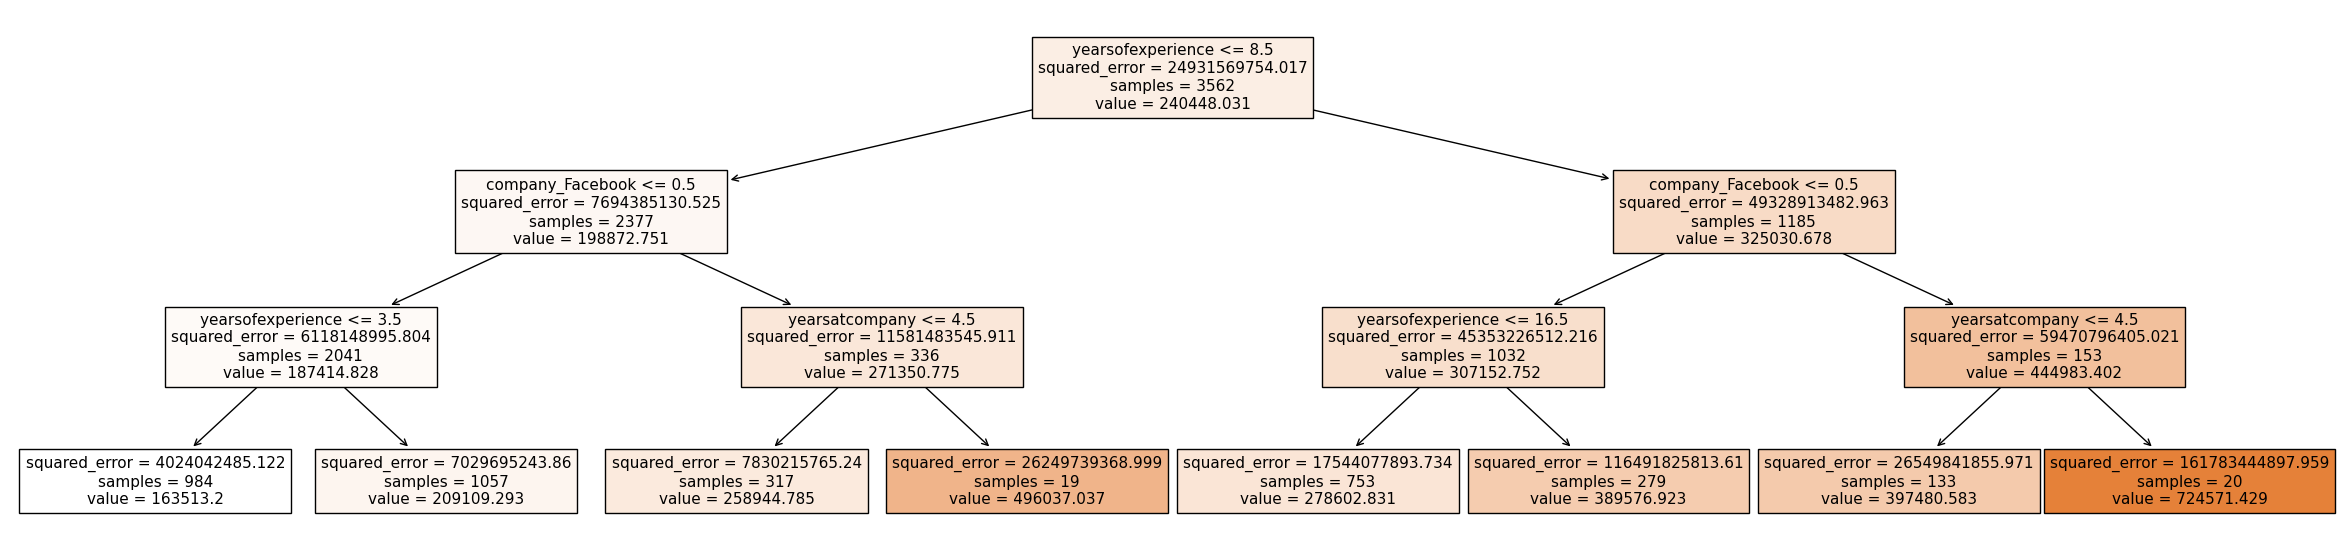

In [ ]:
plot = Random_Forest_pruned.estimators_[0]

plt.figure(figsize=(30, 7))
plot_tree(plot, filled=True, feature_names=x_train.columns); plt.show()# type: ignore

similar but distinct from R as once again - unlike part 6 this model is deterministic, but the BAgg tree algorithm is implemented differently here & in R
also note that unlike part 7 the values of the >/<= 8.5 years experience terminal nodes overlap in value - which is only seen in the RF model

### **MSE Time:**

heres another table to visualize the error margin:

In [8]:
outDF = pd.DataFrame(testing_data)

outDF['Predicted salary'] = RF_predictions; outDF['Pruned Predicted salary'] = RF_predictions_pruned
outDF['Actual salary'] = outDF['totalyearlycompensation']
outDF['Predicted salary'] = outDF['Predicted salary'].astype(int); outDF['Pruned Predicted salary'] = outDF['Pruned Predicted salary'].astype(int)
outDF = outDF[['Predicted salary', 'Pruned Predicted salary', 'Actual salary'] + ['company', 'yearsofexperience', 'yearsatcompany', 'gender', 'Race', 'Education']]

outDF.head(15)

,Predicted salary,Pruned Predicted salary,Actual salary,company,yearsofexperience,yearsatcompany,gender,Race,Education
7434,561576,391912,700000,Facebook,16,2,Male,White,Master's Degree
5872,592082,343107,650000,Google,16,8,Male,Asian,Master's Degree
568,155963,208469,122000,Microsoft,7,0,Male,White,Master's Degree
6679,260899,274767,280000,Microsoft,12,7,Male,Asian,Master's Degree
7190,288993,278572,267000,Amazon,12,5,Male,Asian,Bachelor's Degree
5269,158185,163330,144000,Amazon,0,0,Male,Asian,Master's Degree
641,316201,232376,330000,Apple,8,0,Male,Asian,Master's Degree
4662,142481,207300,120000,Amazon,4,2,Female,Two Or More,Some College
3746,387337,211567,455000,Google,6,5,Male,White,Bachelor's Degree
5580,485046,328331,575000,Microsoft,17,13,Male,Hispanic,Master's Degree


note that the pruned tree is occasionally better, but non pruned is superior

& now the MSE:

In [9]:
print("Pruned BAgg tree:")
y_test = testing_data['totalyearlycompensation']
pme  =  (y_test - RF_predictions_pruned).mean()
pmse = ((y_test - RF_predictions_pruned) ** 2).mean()
print("Average Error: ", pme, "\t Mean Squared Error: ", pmse)

print("BAgg tree:")
y_test = testing_data['totalyearlycompensation']
me  =  (y_test - RF_predictions).mean()
mse = ((y_test - RF_predictions) ** 2).mean()
print("Average Error: ", me, "\t Mean Squared Error: ", mse)

Pruned BAgg tree:
Average Error:  721.4039320765099 	 Mean Squared Error:  11120732120.931292
BAgg tree:
Average Error:  -851.1735121174542 	 Mean Squared Error:  3578458680.015494


note the smaller error for the non pruned tree -- so this model has no over-fit that can be solved with prune, or only has minor amounts of over-fit that only demand mild pruning

### **Next Notebooks: Boosting and PCA**